# EXO3 : Bayésien naïf discret

Question de cours :

 les paramètres à estimer la contribution de chaque pixel fait à la classe 
 on les stocke dans un array 
 

In [1]:
import pickle, gzip, math, operator, numpy as np
from operator import itemgetter

# Load the dataset
f = gzip.open('./mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, valid_set, test_set = p
labels = train_set[1] # labels
images = train_set[0] # images 
images_test = test_set[0] # images de test
labels_test = test_set[1] # labels de test
# C  # de classes
C = 10  
 

# transformation des images en binaire ( binary pixel)
def images_binaire(image):
    x = np.zeros(len(image))
    for i in range(len(image)):
        if np.all((image[i]>0.5)):
            x[i]=1
        elif np.all((image[i]<=0.5)):
            x[i]=0

    return x

# Calcule de prior
priori = {}
for i in range(C):
    priori[i] = np.log(len(labels[labels == i]) / len(labels))

In [ ]:
# binariser toutes les images 
j = 0
for i in images :
    images[j]= images_binaire(i)
    j+=1

In [3]:
# binariser toutes les images de test
j = 0
for i in images_test :
    images_test[j]= images_binaire(i)
    j+=1

In [26]:
p = np.zeros((C, 784))


# l'estimation de priori pour chaque pixel
for x, pic in enumerate(images):
    
    p[labels[x]]= p[labels[x]] + pic # addition des pixels 
    
for i in range(C):
    p[i] = p[i] / p[i].sum()

In [5]:

def prediction(pic, p):
    inference = {}   
    for k in range(C):        
        x = pic[p[k] != 0] # sélictionner les pixels qui sont pas null dans l'estimation de la classe k
        py = p[k][p[k] != 0] # sélictionner les pixels de l'etimation de la classe k qui sont pas null 
        likelihood = (x * np.log(py) + (1-x)* np.log(1-py) ).sum()
        inference[k] = likelihood + priori[k]
    return inference


In [47]:

acc = 0
for i in range(len(images_test)):
    predire = prediction(test_set[0][i], p)
#     print (predire)
    res = max(predire.items(), key=operator.itemgetter(1))[0]
#     print (res)
#     print (test_set[1][i])
    if res == test_set[1][i] :
        acc= acc +1 
    else :
        0
acc = acc /(len(labels_test))
print(" le taux de réussite est de :",acc * 100 ,"%") 

 Une réussite de : 81.26 %


In [50]:
# lissage de la place 
# soit alpha = 1e-9
alpha = 1e-9
p_lissage = np.zeros((C,784))
for x, pic in enumerate(images):
    p_lissage[labels[x]] = p_lissage[labels[x]]+pic+alpha
for k in range(C):
    p_lissage[k] = p_lissage[k] /(p_lissage[k].sum()+(2*alpha))
    


In [51]:
acc = 0
for i in range(len(images_test)):
    predire = prediction(test_set[0][i], p_lissage)
#     print (predire)
    res = max(predire.items(), key=operator.itemgetter(1))[0]
#     print (res)
#     print (test_set[1][i])
    if res == test_set[1][i] :
        acc= acc +1 
    else :
        0
acc = acc /(len(labels_test))
print(" le taux de réussite est de :",acc *100 ,"%") 


 Une réussite de : 83.67 %


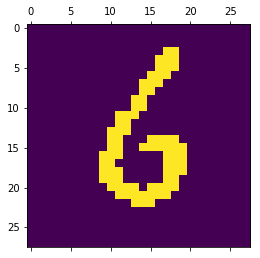

6


In [55]:
#test 
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(images_test[50].reshape(28,28))
plt.show()

predire = prediction(images_test[50], p)
res = max(predire.items(), key=operator.itemgetter(1))[0]
print(res)

# EXO1 : 

1) l'hypothese qui est faite sur la dépendance entre les pixels est la suivante :

le classifieur traite pixel par pixel. 
Tous les pixels sont indépendants des autres

2)l'impact sur la matrice de covariance : 

si l'hypothèse est verifiée, les valeurs de 
la matrice de covariance devraient etre nulles sauf au niveau de 
la diagonale les valeurs devraient etre les variances de chaque pixel.
pour vérifier cette hypothèse, il suffit de vérifier 
toutes les valeurs de la matrice de covariance : 
s'il y a une valeur non nul et qui n'appartient pas à la diagonale, 
cela veut dire que tous les pixels ne sont pas indépendants.





les paramètres à estimer sont les paramètres de la matrice de covariance 



# EXO2 : Bayésien Naif Gaussien

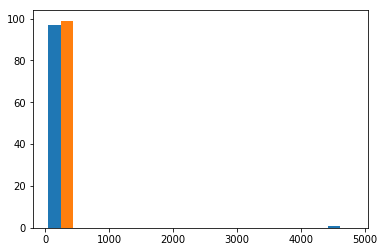

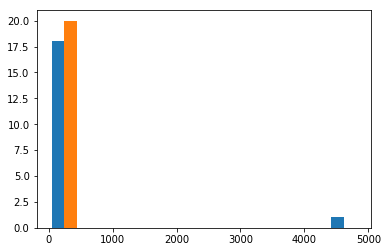

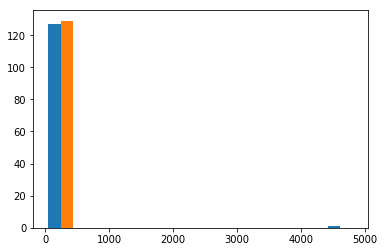

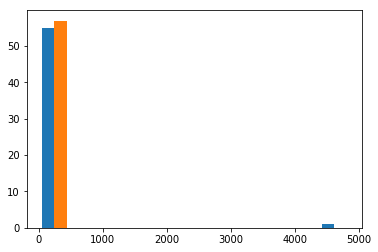

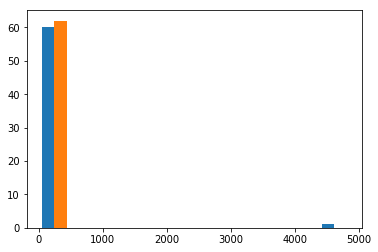

In [33]:
img4 = images[labels == 4]
v = np.var(img4, axis = 0)
var_max = np.argsort(v)

for i in var_max[-5:]:
  # Afficher l'histogramme du pixel de rang i
  vp = np.array([img[i] for img in img4])
  plt.hist(np.histogram(vp, bins=np.arange(np.argmax(vp))))
  plt.show()

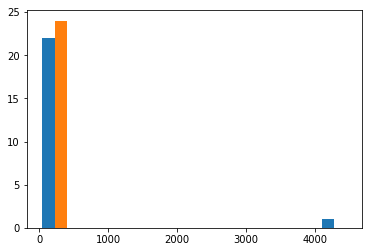

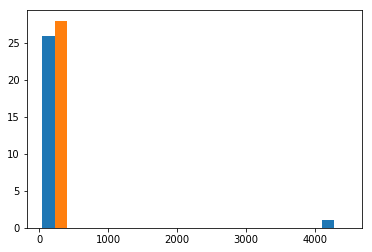

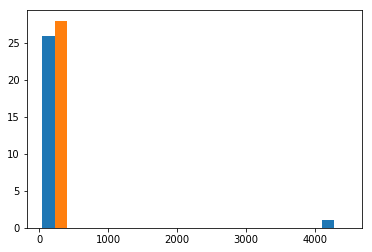

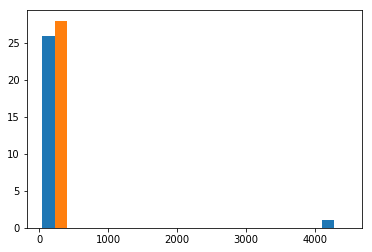

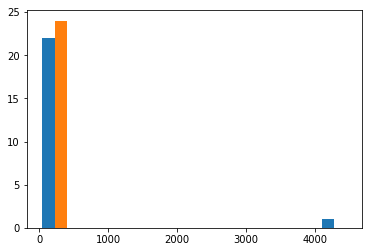

In [34]:
img5 = images[labels == 5]
v = np.var(img5, axis = 0)
var_max = np.argsort(v)

for i in var_max[-5:]:
  # Afficher l'histogramme du pixel de rang i
  vp = np.array([img[i] for img in img5])
  plt.hist(np.histogram(vp, bins=np.arange(np.argmax(vp))))
  plt.show()

In [ ]:
# on remarque que les 200 premières images ont une grande variance
# contrairement aux autres images qui ont une varience très faible

In [35]:
import random 
from scipy.stats import norm
moy_a = random.uniform(0, 1)
moy_b = random.uniform(0, 1)
var_a = random.uniform(0, 1)
var_b = random.uniform(0, 1)
alpha1 = 0.1
alpha2 = 1 - alpha1
pixel =198
# récuperer les images du label 5
substrain = images[labels==5]
#initialiser les tableaux de contribution 
contrib_a = np.zeros(len(subtrain),dtype=np.float32)
contrib_b = np.zeros(len(substrain),dtype=np.float32)

for j in range(20) : 
    for i in range (len(substrain)):
        # normalisation 
        norm_a = norm.cdf(pixel, moy_a, np.sqrt(var_a))
        norm_b = norm.cdf(pixel, moy_b, np.sqrt(var_b))
        a = (alpha1 * norm_a) / ((alpha1 * norm_a) + (alpha2 * norm_b))
        # calcul de contribution pour le pixel 198 de chaque image pour a et b
        contrib_a[i] = (alpha1 * norm_a) / ((alpha1 * norm_a) + (alpha2 * norm_b))
        contrib_b [i] = (alpha2 * norm_b) / ((alpha1 * norm_a) + (alpha2 * norm_b))
    somme = 0
    somme_a = 0.0
    somme_b = 0.0
    # calculer la somme des contributions
    for i in range(len(substrain)):
        somme_a = somme_a + (contrib_a[i] * images[i][198])
        somme_b = somme_b + (contrib_b[i] * images[i][198])   
    
    # recalculer de nouveau la valeur de la moyenne de a et b
    moy_a = somme_a / contrib_a.sum()
    moy_b = somme_b / contrib_b.sum()
    
    #recalculer la valeur des deux variences
    for i in range (len(substrain)):
        var_a = pow((contrib_a[i] - moy_a),2) / contrib_a.sum()
        var_b = pow((contrib_b[i] - moy_b),2) / contrib_b.sum()
    #recalculer les valeurs de alpha1 et alpha2
    alpha1 = contrib_a.sum() / (contrib_a.sum() + contrib_b.sum())
    alpha2 = 1 - alpha1